# Příklad o Pizze
* Chceš jít s kamarádem na Pizzu.
* Nabídka je jasná, menší pizza stojí 100; větší, která má o 10cm větší průměr, stojí 200

## Otázky
* Při jakém průměru se vyplatí koupit 2 menší, a kdy 1 větší?
* Vyplatí se někdy koupit 1 větší než 3 menší?

---
---
# Pokud je toto tvůj první Jupyter Notebook:
* Každá buňka se provede po stisknutí shift-Enter, musíš v ní mít ale kurzor.
* Po uspěšném proběhnutí buňky se objeví alevo od ní "pořadové" číslo průběhu.
* Pro provedení buňky a vytvoření nové prázdné pod ní, tiskni Alt-Enter.
* Jakýkoli text za znakem # je komentář a Python ho ignoruje až do konce řádku.
* Pozor: Pokud proběhneš prázdnou buňku, která má pod sebou výstup jako nápovědu, nápověda ti zmizí, proto Alt-Enter.
---
---

In [19]:
# importuj  klasické moduly jako ve výkladu
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# neznámá je tedy průměr pizzy (d)
# vytvoř pole rozumných hodnot d
d = np.linspace(0, 50, 101)
print(d)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5 50. ]


## Podmínka kterou hledáme, je kdy dvě plochy menší pizzy je víc než plocha 1 větší

$2S_{mensi}{\gt}S_{vetsi}$

* Doufejme, ze je pizza kruhová

$ 2{\cdot}\pi\left(\dfrac{d}{2}\right)^2 \gt \pi\left(\dfrac{d+10}{2}\right)^2$

Po převedení na jednu stranu řešíme kdy má daná FUNKCE hodnoty > 0
* POZN. $\pi$ se v pythonu zapisuje jako np.pi

In [21]:
# spočti hodnoty funkce pro d, která sis vybrala
f1 = 2*np.pi*(d/2)**2-np.pi*((d+10)/2)**2

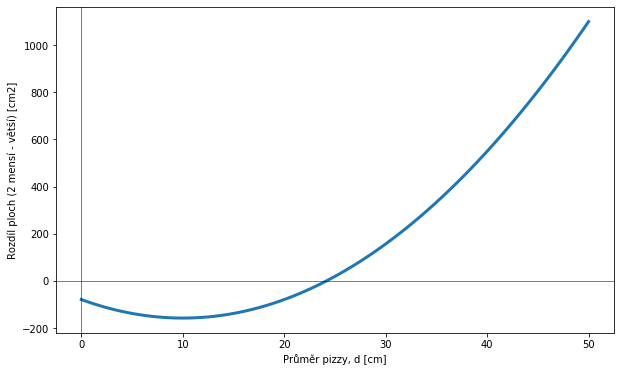

In [22]:
# A teď vykresli nasi funkci, spolu s osou x, jako je níže
fig = plt.figure(figsize=(10,6))
plt.plot(d, f1, lw=3)
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Průměr pizzy, d [cm]')
plt.ylabel('Rozdíl ploch (2 mensí - větší) [cm2]')
plt.show()

### Od nějakých 23cm průměru se vždy vyplatí koupit 2 menší pizzy
---

## Spočtěme průsečík přesně. Máme dvě možnosti:
1. Ve výkladu máme metodu, kdy musíme znát a,b,c, tedy upravit náš výraz na papíře.
2. Při řešení složitých výrazů to neni moc výhodné pokaždé přepočítávat a,b,c.
* Proto líní programátoři vymysleli funkci FSOLVE, která řeší rovnice numericky.

In [23]:
# musíme si ji však importovat, abychom ji mohli použít
from scipy.optimize import fsolve

In [24]:
## Do fsolve musíme vložit funkci proměné/proměných
## To můžeme udělat například následovně:
# definuji (def) funkci jménem rozdil_ploch (to co vykreslujeme na ose y)
def rozdil_ploch(d):  # rozdil_ploch je závislý jen na d
    rozdil = 2*np.pi*(d/2)**2-np.pi*((d+10)/2)**2  # stejný výraz jako výše
    return rozdil  # 'návrat', tzn. funkce vrací proměnou, a to co chceme vrátit je rozdil.

In [25]:
# funcki si otestujeme
rozdil_ploch(10)

-157.07963267948966

To znamená, že pro průměr 10cm, 2 pizzy jsou menší o $157\,cm^2$.

---

## Můžete sami vyzkoušet vkládat různé hodnoty d
 * Zkusmo tak zjistíte, kdy přesně se rozdíl ploch stane kladným.
 * A to je moment, kdy chcete koupit větší pizzu místo 2 malých.

In [26]:
# Teď vložíme tento výraz do fsolve, abychom to měli doufejme přesnější a hned
fsolve(rozdil_ploch)

TypeError: fsolve() missing 1 required positional argument: 'x0'

In [27]:
# Co znamená tato chyba?
# fsolve po nás potřebuje nutný vstupní parametr x0: 
# což je odhad (nástřel) řešení.
fsolve(rozdil_ploch, 11)

array([24.14213562])

# Vyzkoušejte sami
## Bohužel nemůžeme být příliš důvěřiví:
* Pokud budete s x0 blízko prvního průsečíku, vrátí se vám kořen kv. rovnice, který je nelogický (negativní pizza).
* Pokud budete blízko Vrcholu (x0=10), tj. minima kv. funkce, fsolve bude zmaten, kterým směrem se z minima paraboly vydat.
* Pokud budete rozumně blízko s x0, máte vyhráno.

---

## Teď zkuste vyřešit, kdy se vyplatí 1 větší místo tří menších
* pozor, tato otázka je opačně položena než ta první

In [28]:
## definuj f2, podobně jako předtím f1
f2 = np.pi*((d+10)/2)**2 - 3*np.pi*(d/2)**2

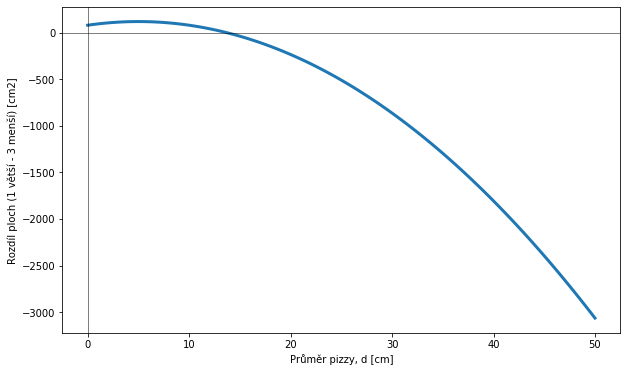

In [41]:
# Vykresli svou funkci spolu s osami, jako je níže
fig = plt.figure(figsize=(10,6))
plt.plot(d, f2, lw=3)
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Průměr pizzy, d [cm]')
plt.ylabel('Rozdíl ploch (1 větší - 3 menší) [cm2]')
plt.show()

In [31]:
# definuj rozdil_ploch2 (to co vykreslujeme na ose y), který zavisí jen na d
# novou funkci potřebujeme protože teď počítáme 3 vs 1
def rozdil_ploch2(d):
    rozdil = np.pi*((d+10)/2)**2 - 3*np.pi*(d/2)**2  # stejný výraz jako výše
    return rozdil  # vrací rozdíl ploch

In [32]:
# Zkuste fsolve pro x0=11
fsolve(rozdil_ploch2, 11)

array([13.66025404])

Do 13.7 cm je lepší koupit 1 větší než 3 menší pizzy

---

## Jestli už vám vyhládlo, dobrá práce. Teď už víte, jak na pizzu.
## Pokud ne, zkuste rozšířit řešení o problém se suchým okrajem...

* Co když nemáte rádi okraj pizzy, který je vždy 1cm okraje, a tedy by měl být vyloučen z úvah?
* Jak to ovlivní vaše rozhodnutí se 2 a třemi pizzami?

In [37]:
# Nejjednodušší je upravit naše funkce pro výpočet rozdílu ploch 
# přidáním volného parametru okraj, který má význam tloušťky okraje v cm.
def rozdil_ploch(d, okraj=0): # okraj=0, pokud neuvedeme parametr okraj, python použije tuto předdefinovanou autorem
    rozdil = 2*np.pi*((d-2*okraj)/2)**2 - np.pi*((d+10-2*okraj)/2)**2
    return rozdil

# pro 3 vs 1
def rozdil_ploch2(d, okraj=0):
    rozdil = np.pi*((d+10-2*okraj)/2)**2 - 3*np.pi*((d-2*okraj)/2)**2
    return rozdil

In [49]:
# Zopakujte fsolve
fsolve(rozdil_ploch, 15, args=1)

array([26.14213562])

In [50]:
fsolve(rozdil_ploch2, 15, args=1)

array([15.66025404])

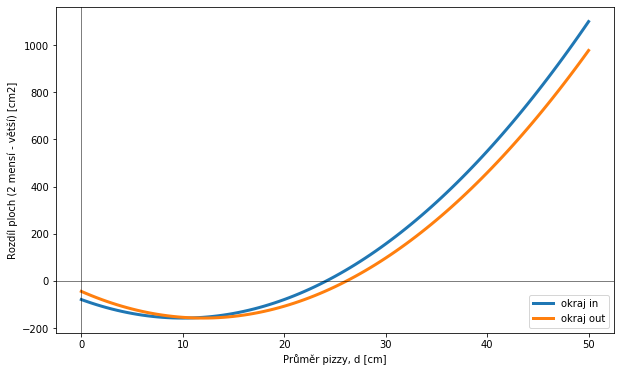

In [51]:
# A vykreslení grafů
fig = plt.figure(figsize=(10,6))
plt.plot(d, f1, lw=3, label='okraj in')
plt.plot(d, rozdil_ploch(d,1), lw=3, label='okraj out')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Průměr pizzy, d [cm]')
plt.ylabel('Rozdíl ploch (2 mensí - větší) [cm2]')
plt.legend()
plt.show()

## Otázka k zamyšlení:
### Je správně, že křivka pro d < cca 10 roste? Jak si to vysvětluješ? 

----

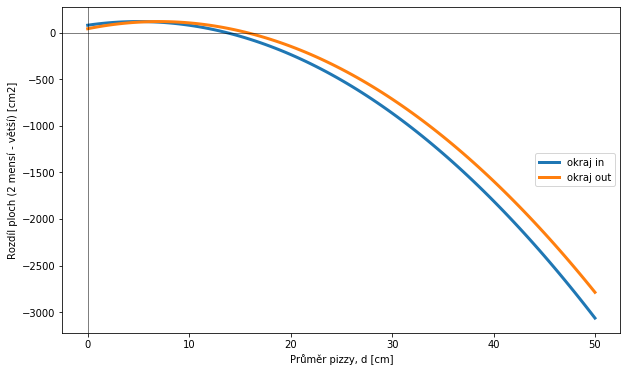

In [44]:
fig = plt.figure(figsize=(10,6))
plt.plot(d, f2, lw=3, label='okraj in')
plt.plot(d, rozdil_ploch2(d,1), lw=3, label='okraj out')
plt.axhline(0, -5, 5, color='k', lw=0.5)
plt.axvline(0, -5, 5, color='k', lw=0.5)
plt.xlabel('Průměr pizzy, d [cm]')
plt.ylabel('Rozdíl ploch (1 větší - 3 menší) [cm2]')
plt.legend()
plt.show()

# Gratuluji k dokončení a Zdar!!!